In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
np.random.seed(42)

data = {
    "employee_id": np.arange(1, 501),
    "expense_amount": np.random.normal(5000, 2000, 500),
    "expense_type": np.random.choice(["Travel", "Food", "Accommodation"], 500),
    "approval_days": np.random.randint(1, 15, 500),
    "is_manager": np.random.choice([0, 1], 500)
}

df = pd.DataFrame(data)

# Remove negative expense values
df["expense_amount"] = df["expense_amount"].abs()

df.head()

,employee_id,expense_amount,expense_type,approval_days,is_manager
0,1,5993.428306,Food,10,0
1,2,4723.471398,Food,2,1
2,3,6295.377076,Accommodation,5,1
3,4,8046.059713,Accommodation,9,1
4,5,4531.693251,Travel,9,1


In [3]:
def generate_violation(row):
    # Rule 1: Expense > 10000 and not manager
    if row["expense_amount"] > 10000 and row["is_manager"] == 0:
        return 1
    
    # Rule 2: Approval delay > 7 days
    if row["approval_days"] > 7:
        return 1
    
    # Rule 3: Travel expense > 15000
    if row["expense_type"] == "Travel" and row["expense_amount"] > 15000:
        return 1
    
    return 0

df["violation"] = df.apply(generate_violation, axis=1)

df["violation"].value_counts()

violation
1    274
0    226
Name: count, dtype: int64

In [4]:
# Convert categorical variable to numeric
df_encoded = pd.get_dummies(df, columns=["expense_type"], drop_first=True)

X = df_encoded.drop(["employee_id", "violation"], axis=1)
y = df_encoded["violation"]

X.head()

,expense_amount,approval_days,is_manager,expense_type_Food,expense_type_Travel
0,5993.428306,10,0,True,False
1,4723.471398,2,1,True,False
2,6295.377076,5,1,False,False
3,8046.059713,9,1,False,False
4,4531.693251,9,1,False,True


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        59

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



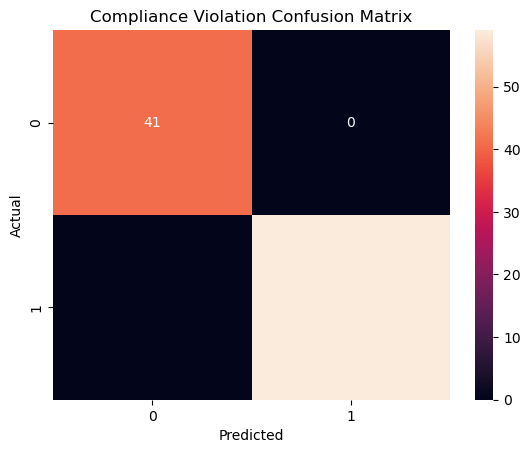

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Compliance Violation Confusion Matrix")
plt.show()

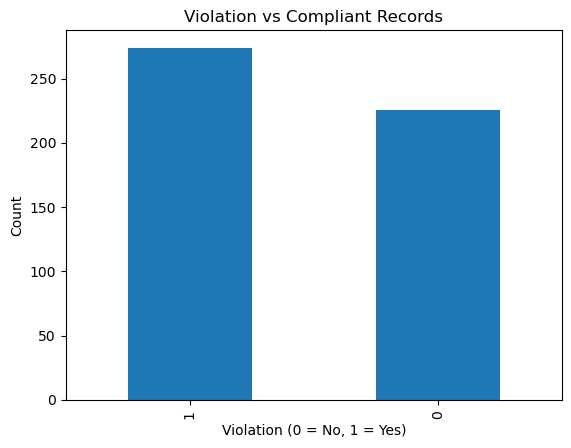

In [8]:
plt.figure()
df["violation"].value_counts().plot(kind="bar")
plt.title("Violation vs Compliant Records")
plt.xlabel("Violation (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

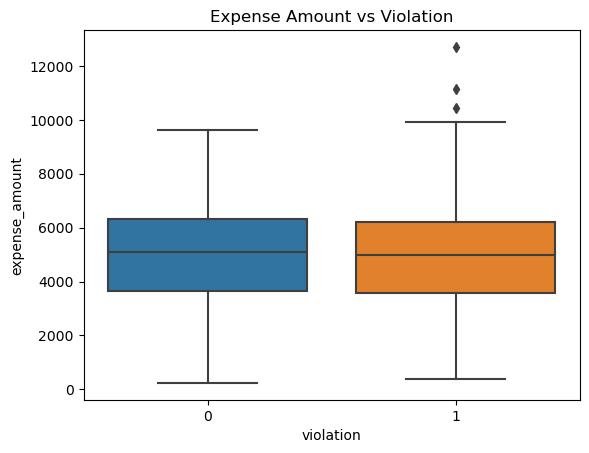

In [9]:
plt.figure()
sns.boxplot(x="violation", y="expense_amount", data=df)
plt.title("Expense Amount vs Violation")
plt.show()

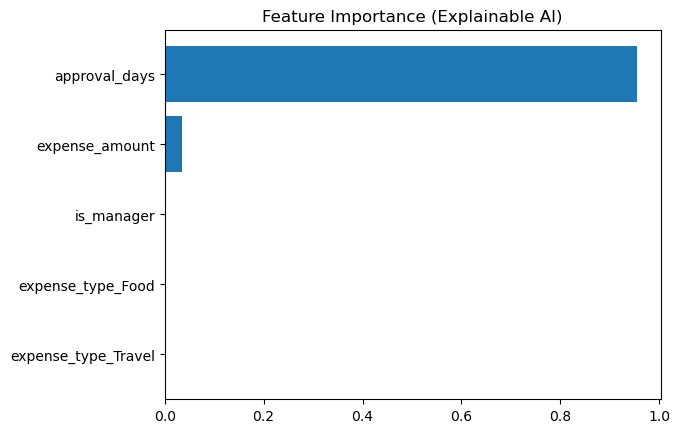

,Feature,Importance
1,approval_days,0.955302
0,expense_amount,0.035707
2,is_manager,0.003487
3,expense_type_Food,0.002856
4,expense_type_Travel,0.002648


In [10]:
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure()
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.title("Feature Importance (Explainable AI)")
plt.gca().invert_yaxis()
plt.show()

importance_df

In [11]:
new_data = pd.DataFrame({
    "expense_amount": [12000, 3000],
    "approval_days": [5, 10],
    "is_manager": [0, 1],
    "expense_type_Food": [0, 1],
    "expense_type_Travel": [1, 0]
})

predictions = model.predict(new_data)

print("Predicted Violations:")
print(predictions)

Predicted Violations:
[0 1]
